In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pathlib

In [3]:
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12, 8)

---

## Load Data

In [15]:
data_path = pathlib.Path("../data")
for fpath in data_path.iterdir():
    if fpath.as_posix().endswith("csv"):
        print(fpath)

../data/feature_information_2.csv
../data/test_features.csv
../data/train_features.csv
../data/train_labels.csv


In [16]:
train_features_fpath = data_path / "train_features.csv"
train_labels_fpath = data_path / "train_labels.csv"
feature_info_fpath = data_path / "feature_information_2.csv"

In [18]:
train_features = pd.read_csv(train_features_fpath)
train_features.head()

pid  Time   Age  EtCO2  PTT   BUN  Lactate  Temp  Hgb  HCO3  ...  \
0    1     3  34.0    NaN  NaN  12.0      NaN  36.0  8.7  24.0  ...   
1    1     4  34.0    NaN  NaN   NaN      NaN  36.0  NaN   NaN  ...   
2    1     5  34.0    NaN  NaN   NaN      NaN  36.0  NaN   NaN  ...   
3    1     6  34.0    NaN  NaN   NaN      NaN  37.0  NaN   NaN  ...   
4    1     7  34.0    NaN  NaN   NaN      NaN   NaN  NaN   NaN  ...   

   Alkalinephos   SpO2  Bilirubin_direct  Chloride   Hct  Heartrate  \
0           NaN  100.0               NaN     114.0  24.6       94.0   
1           NaN  100.0               NaN       NaN   NaN       99.0   
2           NaN  100.0               NaN       NaN   NaN       92.0   
3           NaN  100.0               NaN       NaN   NaN       88.0   
4           NaN  100.0               NaN       NaN  22.4       81.0   

   Bilirubin_total  TroponinI   ABPs    pH  
0              NaN        NaN  142.0  7.33  
1              NaN        NaN  125.0  7.33  
2              NaN        NaN  110.0  7.37  
3              NaN        NaN  104.0  7.37  
4              NaN        NaN  100.0  7.41  

[5 rows x 37 columns]

In [19]:
train_features.describe()

pid           Time            Age        EtCO2           PTT  \
count  227940.000000  227940.000000  227940.000000  9783.000000  10299.000000   
mean    15788.831219       7.014399      62.073809    32.883114     40.091310   
std      9151.896286       4.716103      16.451854     7.802065     26.034961   
min         1.000000       1.000000      15.000000    10.000000     12.500000   
25%      7879.000000       4.000000      52.000000    28.500000     27.800000   
50%     15726.000000       7.000000      64.000000    33.000000     32.200000   
75%     23725.000000      10.000000      74.000000    38.000000     40.600000   
max     31658.000000     315.000000     100.000000   100.000000    250.000000   

                BUN       Lactate          Temp           Hgb         HCO3  \
count  20105.000000  10756.000000  81115.000000  22295.000000  12559.00000   
mean      23.192664      2.859716     36.852136     10.628208     23.48810   
std       20.024289      2.428368      0.875152      2.074859      4.40378   
min        1.000000      0.200000     21.000000      3.300000      0.00000   
25%       12.000000      1.400000     36.000000      9.200000     21.00000   
50%       17.000000      2.100000     37.000000     10.500000     23.90000   
75%       27.000000      3.400000     37.000000     12.000000     26.00000   
max      268.000000     31.000000     42.000000     23.800000     50.00000   

       ...  Alkalinephos           SpO2  Bilirubin_direct      Chloride  \
count  ...   5708.000000  195192.000000        719.000000  13917.000000   
mean   ...     97.796163      97.663449          1.390723    106.260185   
std    ...    122.773379       2.786186          2.792722      5.916082   
min    ...     12.000000      20.000000          0.010000     66.000000   
25%    ...     53.000000      96.000000          0.100000    103.000000   
50%    ...     72.000000      98.000000          0.300000    107.000000   
75%    ...    104.000000     100.000000          1.210000    110.000000   
max    ...   3833.000000     100.000000         21.200000    141.000000   

                Hct      Heartrate  Bilirubin_total    TroponinI  \
count  27297.000000  200128.000000      5326.000000  3776.000000   
mean      31.283090      84.522371         1.640941     7.269240   
std        5.770425      17.643437         3.244145    25.172442   
min        9.400000      23.000000         0.100000     0.010000   
25%       27.300000      72.000000         0.500000     0.030000   
50%       30.900000      83.000000         0.800000     0.150000   
75%       35.000000      95.000000         1.400000     2.050000   
max       63.400000     191.000000        46.500000   440.000000   

                ABPs            pH  
count  191650.000000  25046.000000  
mean      122.369877      7.367231  
std        23.273834      0.074384  
min        21.000000      6.820000  
25%       105.000000      7.330000  
50%       119.000000      7.370000  
75%       137.000000      7.410000  
max       287.000000      7.780000  

[8 rows x 37 columns]

In [20]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227940 entries, 0 to 227939
Data columns (total 37 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   pid               227940 non-null  int64  
 1   Time              227940 non-null  int64  
 2   Age               227940 non-null  float64
 3   EtCO2             9783 non-null    float64
 4   PTT               10299 non-null   float64
 5   BUN               20105 non-null   float64
 6   Lactate           10756 non-null   float64
 7   Temp              81115 non-null   float64
 8   Hgb               22295 non-null   float64
 9   HCO3              12559 non-null   float64
 10  BaseExcess        19887 non-null   float64
 11  RRate             187785 non-null  float64
 12  Fibrinogen        2493 non-null    float64
 13  Phosphate         11590 non-null   float64
 14  WBC               19083 non-null   float64
 15  Creatinine        17792 non-null   float64
 16  PaCO2             21

In [21]:
train_labels = pd.read_csv(train_labels_fpath)
train_labels.head()

pid  LABEL_BaseExcess  LABEL_Fibrinogen  LABEL_AST  LABEL_Alkalinephos  \
0      1               1.0               0.0        0.0                 0.0   
1     10               0.0               0.0        0.0                 0.0   
2    100               1.0               0.0        0.0                 0.0   
3   1000               0.0               0.0        0.0                 0.0   
4  10000               0.0               0.0        0.0                 0.0   

   LABEL_Bilirubin_total  LABEL_Lactate  LABEL_TroponinI  LABEL_SaO2  \
0                    0.0            1.0              0.0         0.0   
1                    0.0            0.0              0.0         0.0   
2                    0.0            1.0              0.0         0.0   
3                    0.0            1.0              0.0         1.0   
4                    0.0            0.0              0.0         0.0   

   LABEL_Bilirubin_direct  LABEL_EtCO2  LABEL_Sepsis  LABEL_RRate  LABEL_ABPm  \
0                     0.0          0.0           0.0         12.1        85.4   
1                     0.0          0.0           0.0         17.8       100.6   
2                     0.0          0.0           0.0         16.5        88.3   
3                     0.0          1.0           0.0         19.4        77.2   
4                     0.0          0.0           0.0         12.6        76.8   

   LABEL_SpO2  LABEL_Heartrate  
0       100.0             59.9  
1        95.5             85.5  
2        96.5            108.1  
3        98.3             80.9  
4        97.7             95.3

In [23]:
train_labels.describe()

pid  LABEL_BaseExcess  LABEL_Fibrinogen     LABEL_AST  \
count  18995.000000      18995.000000      18995.000000  18995.000000   
mean   15788.831219          0.268281          0.073704      0.239747   
std     9152.117122          0.443076          0.261295      0.426940   
min        1.000000          0.000000          0.000000      0.000000   
25%     7879.500000          0.000000          0.000000      0.000000   
50%    15726.000000          0.000000          0.000000      0.000000   
75%    23724.500000          1.000000          0.000000      0.000000   
max    31658.000000          1.000000          1.000000      1.000000   

       LABEL_Alkalinephos  LABEL_Bilirubin_total  LABEL_Lactate  \
count         18995.00000           18995.000000   18995.000000   
mean              0.23622               0.240590       0.200211   
std               0.42477               0.427453       0.400168   
min               0.00000               0.000000       0.000000   
25%               0.00000               0.000000       0.000000   
50%               0.00000               0.000000       0.000000   
75%               0.00000               0.000000       0.000000   
max               1.00000               1.000000       1.000000   

       LABEL_TroponinI    LABEL_SaO2  LABEL_Bilirubin_direct   LABEL_EtCO2  \
count     18995.000000  18995.000000            18995.000000  18995.000000   
mean          0.099763      0.233693                0.033904      0.066017   
std           0.299692      0.423190                0.180986      0.248319   
min           0.000000      0.000000                0.000000      0.000000   
25%           0.000000      0.000000                0.000000      0.000000   
50%           0.000000      0.000000                0.000000      0.000000   
75%           0.000000      0.000000                0.000000      0.000000   
max           1.000000      1.000000                1.000000      1.000000   

       LABEL_Sepsis   LABEL_RRate    LABEL_ABPm    LABEL_SpO2  LABEL_Heartrate  
count  18995.000000  18995.000000  18995.000000  18995.000000     18995.000000  
mean       0.057278     18.795960     82.511171     96.947311        84.119716  
std        0.232380      3.511241     12.745110      2.110957        14.718396  
min        0.000000      1.000000     26.000000     27.000000        30.200000  
25%        0.000000     16.550000     73.200000     95.900000        73.700000  
50%        0.000000     18.400000     81.000000     97.100000        83.400000  
75%        0.000000     20.600000     90.200000     98.300000        93.600000  
max        1.000000     41.100000    147.100000    100.000000       155.600000

In [24]:
train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18995 entries, 0 to 18994
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pid                     18995 non-null  int64  
 1   LABEL_BaseExcess        18995 non-null  float64
 2   LABEL_Fibrinogen        18995 non-null  float64
 3   LABEL_AST               18995 non-null  float64
 4   LABEL_Alkalinephos      18995 non-null  float64
 5   LABEL_Bilirubin_total   18995 non-null  float64
 6   LABEL_Lactate           18995 non-null  float64
 7   LABEL_TroponinI         18995 non-null  float64
 8   LABEL_SaO2              18995 non-null  float64
 9   LABEL_Bilirubin_direct  18995 non-null  float64
 10  LABEL_EtCO2             18995 non-null  float64
 11  LABEL_Sepsis            18995 non-null  float64
 12  LABEL_RRate             18995 non-null  float64
 13  LABEL_ABPm              18995 non-null  float64
 14  LABEL_SpO2              18995 non-null

---

## Describe Data

- Basic statistics about each feature
    - Easy for non-categorical/ordinal features
        - How to visualize those?
            - Plot aggregates (counts) and analyze how they are stratefied
- Contextualize
    - Domain knowledge is key
    
- Important plots
    - Histograms

<AxesSubplot:>

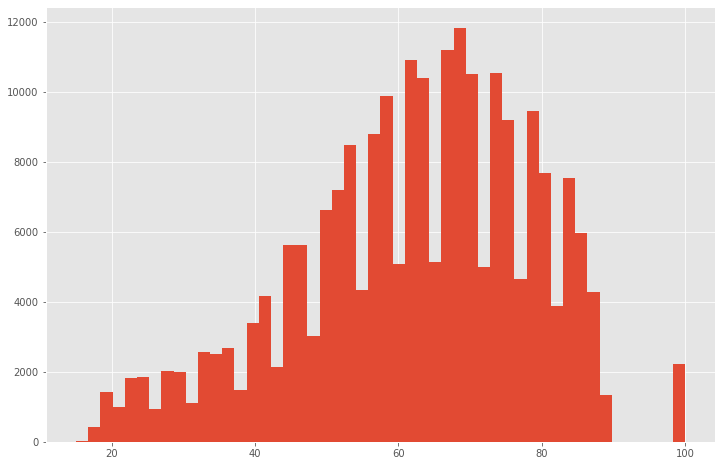

In [30]:
train_features.Age.hist(bins=50)

In [31]:
dir(pd.Series)

['T',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__long__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__

## Cleaning